In [22]:
import gym
import gym_pdw

import numpy as np
from matplotlib import pyplot as plt

In [23]:
env = gym.make('gym_pdw:pdw-v0')

In [24]:
# Q function update 
def update(state, action, reward, next_state, next_action, Q):

    target = reward + gamma*(Q[next_action][next_state[0],next_state[1]])
    estimate = Q[action][state[0],state[1]]

    Q[action][state[0],state[1]] = Q[action][state[0],state[1]] + alpha*(target - estimate)

    return Q

In [25]:
# Epsilon-greedy action selection
def select_action(epsilon, state, Q):
    if np.random.uniform(0,1) < epsilon:
        action = env.random_action()
#             print("rand", action)
    else:
#         print(np.argmax(Q[:,state[0],state[1]]))
        action = np.argmax(Q[:,state[0],state[1]])
#             print("greedy", action)
    return action

In [26]:

def SARSA(gamma, alpha, epsilon, episodes):
    
    # Set the goal variant
    
    goal_pos = env.set_goal('A')
    
    
    # Setting terminal action-state value 
    Terminal_state = goal_pos
    
    
    # Initializing Q function values to zero
    Q = np.zeros([env.action_space.n, env.observation_space.shape[0], env.observation_space.shape[1]])        
    
    # Number of steps required to reach goal
    steps = np.zeros([episodes])
    avg_reward = np.zeros([episodes])

    
    for episode in range(episodes):
        
        env.reset()
        curr_state = env.get_state()
#         print(curr_state ,"init====================")     
        

        while True:

            action = select_action(epsilon, curr_state, Q)
            next_state, reward = env.step(action)

            next_action = select_action(epsilon, next_state, Q)
            Q = update(curr_state, action, reward, next_state, next_action, Q)
            
            steps[episode] +=1
            avg_reward[episode] = avg_reward[episode] + (reward - avg_reward[episode])/steps[episode]

            curr_state = next_state
            st = env.get_start_positions()
#             print(curr_state, "curr_state", st)
            if curr_state == goal_pos:
                print("Steps =======================", steps[episode])
                break
    
    return avg_reward, steps, Q

In [27]:
def plot_sarsa(avg_reward, steps, episodes):
    '''
    Gets the data for all curves and plots them in one graph
    '''

    
    # Figure instances will be returned.
    fig1=plt.figure(figsize=(10,6)).add_subplot(111)
    fig2=plt.figure(figsize=(10,6)).add_subplot(111)

    # colors for different values of epsilon
    colors = ['g', 'r', 'k', 'b', 'y','m', 'c']

    fig1.plot(range(episodes), avg_reward, colors[0], label = " Average reward " )
    fig2.plot(range(episodes), steps, colors[1], label = " Steps")

    # Labelling the plot
    fig1.title.set_text('SARSA avg reward')
    fig1.set_ylabel('Average Reward')
    fig1.set_xlabel('episodes')
    fig1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    # Labelling the plot
    fig2.title.set_text('SARSA num steps')
    fig2.set_ylabel('Steps')
    fig2.set_xlabel('episodes')
    fig2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    # Display the plot
    plt.show()


Steps ======================= 610.0
Steps ======================= 380.0
Steps ======================= 276.0
Steps ======================= 119.0
Steps ======================= 369.0
Steps ======================= 1250.0
Steps ======================= 2147.0
Steps ======================= 111.0
Steps ======================= 575.0
Steps ======================= 1012.0
Steps ======================= 396.0
Steps ======================= 73.0
Steps ======================= 359.0
Steps ======================= 697.0
Steps ======================= 768.0
Steps ======================= 55.0
Steps ======================= 141.0
Steps ======================= 128.0
Steps ======================= 256.0
Steps ======================= 97.0
Steps ======================= 1253.0
Steps ======================= 446.0
Steps ======================= 179.0
Steps ======================= 219.0
Steps ======================= 327.0
Steps ======================= 741.0
Steps ======================= 25.0
Steps ======================

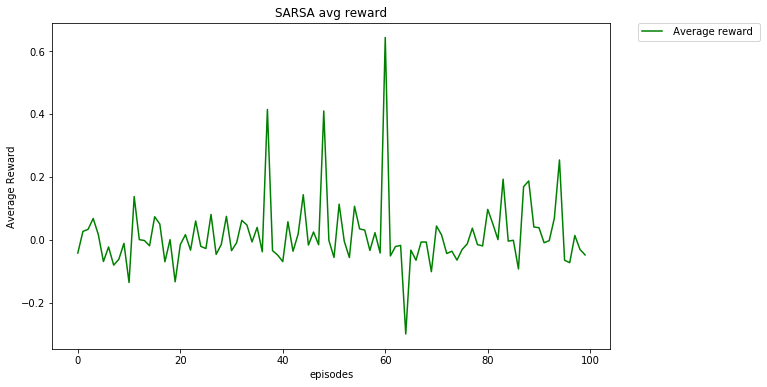

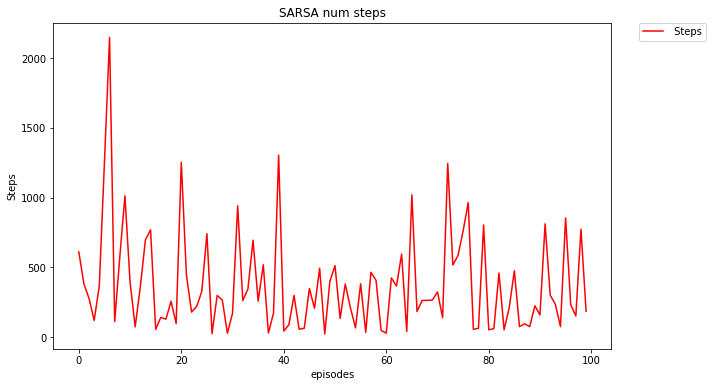

In [31]:
if __name__=='__main__':
    # parameters
    gamma = 0.9
    alpha = 0.01
    epsilon = 0.1
    episodes = 100
    
    avg_reward, steps, Q = SARSA(gamma,alpha,epsilon, episodes)
    plot_sarsa(avg_reward, steps, episodes)

In [33]:
print(env.grid)
print(env.goal_positions)
print(env.actions)


[[ 0  0  0  0  0  0  0  0  0  0  0 20]
 [ 0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 -1 -1 -1 -1 -1 -1  0  0]
 [ 0  0  0  0 -1 -2 -2 -2 -2 -1  0  0]
 [ 0  0  0  0 -1 -2 -3 -3 -2 -1  0  0]
 [ 0  0  0  0 -1 -2 -3 -2 -2 -1  0  0]
 [ 0  0  0  0 -1 -2 -3 -2 -1 -1  0  0]
 [ 0  0  0  0 -1 -2 -2 -2 -1  0  0  0]
 [ 0  0  0  0 -1 -1 -1 -1 -1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0]]
[[0, 11], [2, 9], [7, 8]]
{0: [-1, 0], 1: [0, 1], 2: [0, -1], 3: [1, 0]}


In [32]:
np.argmax(Q, axis=0)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 1, 2, 3, 2, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 3, 2, 0, 2, 0, 0],
       [0, 0, 0, 0, 3, 1, 2, 1, 0, 1, 0, 0],
       [0, 0, 0, 0, 3, 1, 3, 3, 1, 2, 0, 0],
       [0, 0, 0, 0, 2, 1, 2, 2, 0, 3, 0, 0],
       [0, 0, 0, 0, 3, 0, 3, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 2, 1, 2, 3, 3, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [10]:
Q.shape

(4, 12, 12)

0 : [-1,0], # North
1 : [0,1], # East
2 : [0,-1], # West
3 : [1,0] # South 

In [11]:
Q

array([[[ 0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.3994004 ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,
          0.        , -0.01      ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,
          0.        , -0.0298801 ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,
          0.       

In [12]:
# Q = np.zeros((env.observation_space, env.action_space))
env.action_space.n

4

In [13]:
env = gym.make('FrozenLake-v0')

In [14]:
Q = np.zeros((env.observation_space.n, env.action_space.n))

In [15]:
Q

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [16]:
from collections import defaultdict
q_table = defaultdict(lambda: [0.0, 0.0, 0.0, 0.0])
q_table[tuple([10,10]),4]

[0.0, 0.0, 0.0, 0.0]

In [17]:
q = np.zeros([tuple([12,12]),0]) 

TypeError: 'tuple' object cannot be interpreted as an integer

In [ ]:
q = np.zeros([12,12,4])
q[11,11][2]

In [ ]:
q[2,11,11]
s = np.array([11,11])
print(s.shape)
s = np.squeeze(s,1)
print(s.shape)


In [ ]:
Q = np.ones([4,12,12])
Q[1,11,11] = 5
Q[2,5,5] = 4
np.argmax(Q,axis=0)